In [1]:
import pandas as pd     
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import QED, Descriptors, Crippen
from rdkit.Chem import RDConfig
import os
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
# now you can import sascore!
import sascorer
from rdkit.Chem import QED, Descriptors, Crippen

In [2]:
df = pd.read_csv('../data/dockstring-dataset.tsv', sep='\t')
df.head()

,inchikey,smiles,PPARD,ABL1,ADAM17,ADRB1,ADRB2,AKT2,MAOB,CASP3,...,EGFR,F10,GBA,MAPK1,MAPK14,PLK1,SRC,THRB,F2,KDR
0,UMVWYQXKBPJMOF-UHFFFAOYNA-N,C1=C(C2=C(C=C1O)OC(C(C2=O)=O)C3=CC=C(C(=C3)O)O)O,-8.2,-9.1,-9.0,-9.3,-9.7,-8.7,-8.4,-7.2,...,-9.1,-8.4,-9.1,-9.3,-8.3,-9.0,-8.4,-8.8,-8.2,-8.0
1,NGOGFTYYXHNFQH-UHFFFAOYNA-N,O=S(=O)(N1CCNCCC1)C2=CC=CC=3C2=CC=NC3,-7.1,-9.5,-7.0,-7.6,-7.7,-8.2,-6.3,-6.1,...,-7.5,-6.6,-8.0,-8.3,-6.9,-8.6,-7.7,-8.1,-6.8,-7.4
2,BGVLELSCIHASRV-QPEQYQDCNA-N,C=1C=C2S/C(/N(CC)C2=CC1OC)=C\C(=O)C,-6.6,-7.4,-5.9,-7.0,-7.0,-7.1,-6.9,-5.5,...,-6.6,-5.9,-6.4,-7.1,-6.3,-7.0,-6.2,-7.9,-5.8,-6.2
3,KTUFNOKKBVMGRW-RPGFEBOUNA-N,C=1(N=C(C=2C=NC=CC2)C=CN1)NC=3C=C(NC(C4=CC=C(C...,-10.8,-10.2,-11.0,-10.4,-11.5,-11.0,-3.3,-9.4,...,-11.0,-9.0,-9.3,-10.2,-8.8,-10.4,-9.5,-7.4,-9.7,-11.4
4,LLJRXVHJOJRCSM-UHFFFAOYNA-N,C1=CC=2C(=CNC2C=C1)C=3C=CN=CC3,-7.7,-8.6,-7.4,-8.4,-8.2,-7.7,-7.9,-6.2,...,-8.0,-7.0,-7.7,-8.0,-7.8,-7.9,-6.8,-8.5,-6.6,-7.8


In [3]:
df.dropna(inplace=True)

In [4]:
protein_ids = ['PPARD', 'ABL1', 'ADAM17', 'ADRB1', 'ADRB2',
       'AKT2', 'MAOB', 'CASP3', 'DHFR', 'ESR2', 'PTK2', 'FGFR1', 'HMGCR',
       'HSP90AA1', 'KIT', 'MAPKAPK2', 'MAP2K1', 'NOS1', 'PARP1', 'PDE5A',
       'PGR', 'PTPN1', 'ROCK1', 'AKT1', 'AR', 'CDK2', 'CSF1R', 'ESR1', 'NR3C1',
       'IGF1R', 'JAK2', 'LCK', 'MET', 'MMP13', 'PTGS2', 'PPARA', 'PPARG',
       'REN', 'ADORA2A', 'ACHE', 'BACE1', 'CA2', 'CYP2C9', 'CYP3A4', 'HSD11B1',
       'DPP4', 'DRD2', 'DRD3', 'EGFR', 'F10', 'GBA', 'MAPK1', 'MAPK14', 'PLK1',
       'SRC', 'THRB', 'F2', 'KDR']

In [5]:
newdata = {}
from matplotlib import rcParams

sns.set_style("white")
protein_ids = ['LCK']
for key in protein_ids:
    newdata[key] = list(df[key])

In [6]:
newdata 

{'LCK': [-8.1,
  -7.8,
  -6.1,
  -9.3,
  -6.8,
  -7.2,
  -8.1,
  -9.8,
  -9.0,
  -8.2,
  -7.8,
  -8.4,
  -8.3,
  -9.8,
  -8.1,
  -7.5,
  -8.0,
  -9.7,
  -7.3,
  -8.2,
  -9.2,
  -9.2,
  -7.8,
  -9.1,
  -8.4,
  -8.1,
  -8.9,
  -9.4,
  -7.7,
  -7.9,
  -8.2,
  -7.5,
  -8.8,
  -9.3,
  -7.6,
  -8.6,
  -6.5,
  -8.2,
  -8.7,
  -8.0,
  -9.3,
  -6.9,
  -6.5,
  -5.1,
  -8.7,
  -7.5,
  -5.5,
  -7.8,
  -7.9,
  -6.7,
  -9.1,
  -8.7,
  -6.4,
  -8.3,
  -6.5,
  -7.6,
  -7.7,
  -8.5,
  -9.4,
  -7.3,
  -9.4,
  -9.5,
  -6.6,
  -7.4,
  -8.1,
  -9.4,
  -8.8,
  -5.9,
  -8.4,
  -5.4,
  -11.1,
  -6.7,
  -8.7,
  -8.8,
  -8.5,
  -6.5,
  -8.1,
  -8.9,
  -6.9,
  -8.3,
  -8.3,
  -8.4,
  -6.3,
  -8.5,
  -5.6,
  -8.8,
  -7.4,
  -8.1,
  -7.3,
  -7.7,
  -7.8,
  -6.6,
  -7.5,
  -6.4,
  -5.5,
  -6.0,
  -7.5,
  -9.5,
  -6.0,
  -6.0,
  -5.6,
  -8.6,
  -7.0,
  -7.3,
  -8.4,
  -10.8,
  -7.9,
  -7.4,
  -7.4,
  -8.8,
  -6.4,
  -6.5,
  -7.8,
  -6.3,
  -7.9,
  -8.4,
  -6.0,
  -8.4,
  -9.2,
  -6.5,
  -7.7,
  -7.1,
  -8.4,
  -8.2,

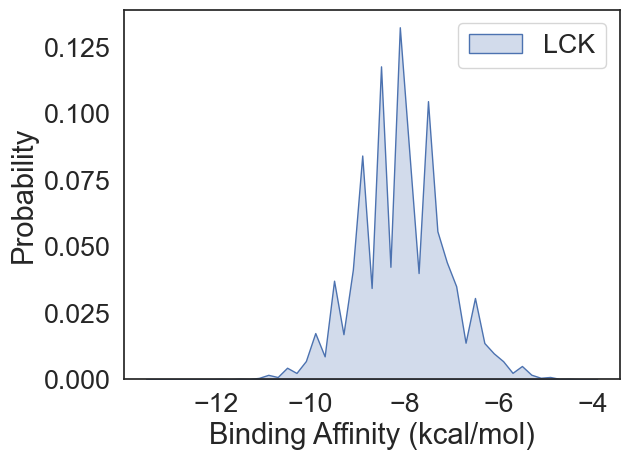

In [7]:
sns.set(font_scale=1.75)  
sns.set_style("white")
sns.histplot(newdata,  stat='probability', element='poly', fill=True, common_norm=True, binwidth=0.2)
plt.xlabel('Binding Affinity (kcal/mol)')
plt.savefig('IMAGES/binding_affinity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

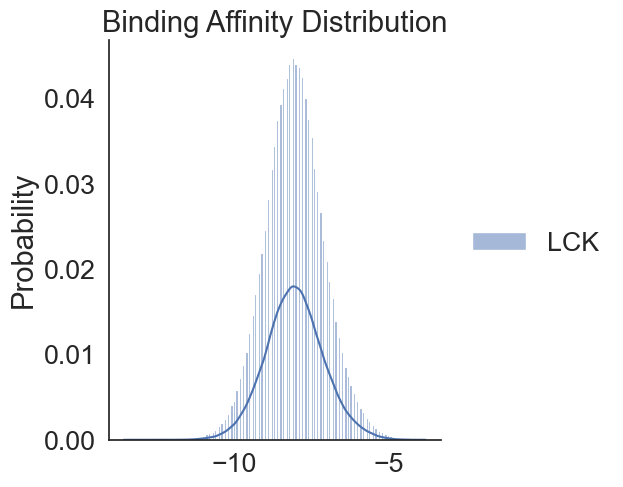

In [8]:
sns.displot(newdata,  kde=True, stat='probability')
plt.title('Binding Affinity Distribution')
plt.savefig('IMAGES/binding_affinity_distribution2.png', dpi=100, bbox_inches='tight')
plt.show()

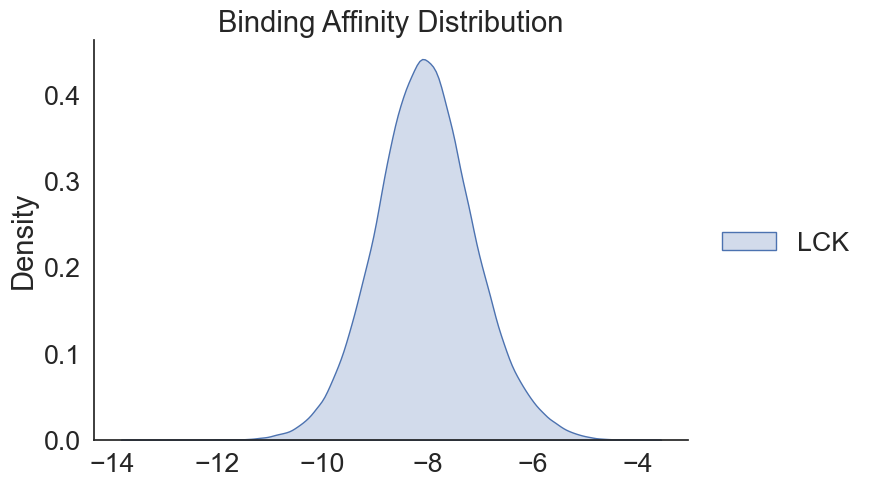

In [9]:
sns.displot(newdata, kind="kde", fill=True, aspect=1.5, height=5)
plt.title('Binding Affinity Distribution')
plt.savefig('IMAGES/binding_affinity_distribution_kde.png', dpi=100, bbox_inches='tight')
plt.show()

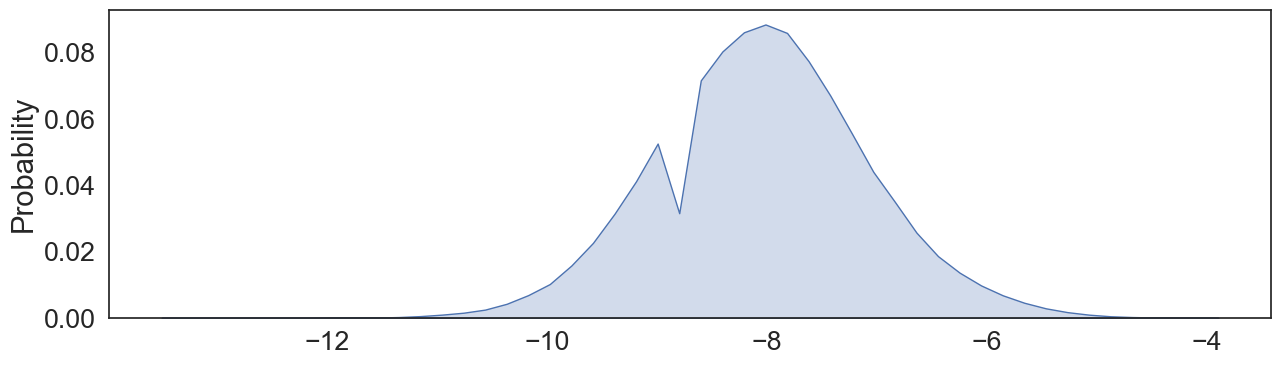

In [10]:
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(15,4)})

sns.set(font_scale=1.75)  
sns.set_style("white")
sns.histplot(newdata,  stat='probability', element='poly', fill=True, common_norm=True, bins=50)
plt.legend('', frameon=False)
plt.savefig('IMAGES/dockstring_'+ key +'_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

In [11]:
from tqdm.auto import tqdm

smiles = list(df['smiles'].values)

qeds = []
tpsas = []
logps = []
sas = []
molwts = []
rdkitsmiles = []
smiles_len = []
for smi in tqdm(smiles):
    m = Chem.MolFromSmiles(smi)
    qeds.append(QED.qed(m))
    tpsas.append(Descriptors.TPSA(m))
    logps.append(Crippen.MolLogP(m))
    rdkitsmiles.append(Chem.MolToSmiles(m))
    sas.append(sascorer.calculateScore(m))
    molwts.append(Descriptors.MolWt(m))
    smiles_len.append(len(smi))

/home2/bhuvan.kapur/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 260060/260060 [13:23<00:00, 323.68it/s]


In [12]:
df.columns

Index(['inchikey', 'smiles', 'PPARD', 'ABL1', 'ADAM17', 'ADRB1', 'ADRB2',
       'AKT2', 'MAOB', 'CASP3', 'DHFR', 'ESR2', 'PTK2', 'FGFR1', 'HMGCR',
       'HSP90AA1', 'KIT', 'MAPKAPK2', 'MAP2K1', 'NOS1', 'PARP1', 'PDE5A',
       'PGR', 'PTPN1', 'ROCK1', 'AKT1', 'AR', 'CDK2', 'CSF1R', 'ESR1', 'NR3C1',
       'IGF1R', 'JAK2', 'LCK', 'MET', 'MMP13', 'PTGS2', 'PPARA', 'PPARG',
       'REN', 'ADORA2A', 'ACHE', 'BACE1', 'CA2', 'CYP2C9', 'CYP3A4', 'HSD11B1',
       'DPP4', 'DRD2', 'DRD3', 'EGFR', 'F10', 'GBA', 'MAPK1', 'MAPK14', 'PLK1',
       'SRC', 'THRB', 'F2', 'KDR'],
      dtype='object')

In [13]:
new_df = pd.DataFrame()
new_df['smiles'] = rdkitsmiles
new_df['qed'] = qeds
new_df['tpsa'] = tpsas
new_df['logp'] = logps
new_df['sas'] = sas
new_df['molwt'] = molwts
new_df['affinity'] = df['LCK'].values
print(len(new_df))
new_df.to_csv("../data/lck_dockstring_data1.csv")


260060


In [14]:
tempdf = pd.DataFrame()
tempdf['QED'] = qeds
tempdf['TPSA'] = tpsas
tempdf['LogP'] = logps
tempdf['SAS'] = sas
tempdf['MolWt'] = molwts
tempdf['SMILES length'] = smiles_len

key = 'SMILES length'
newdata = pd.DataFrame()
newdata[key] = tempdf[key]

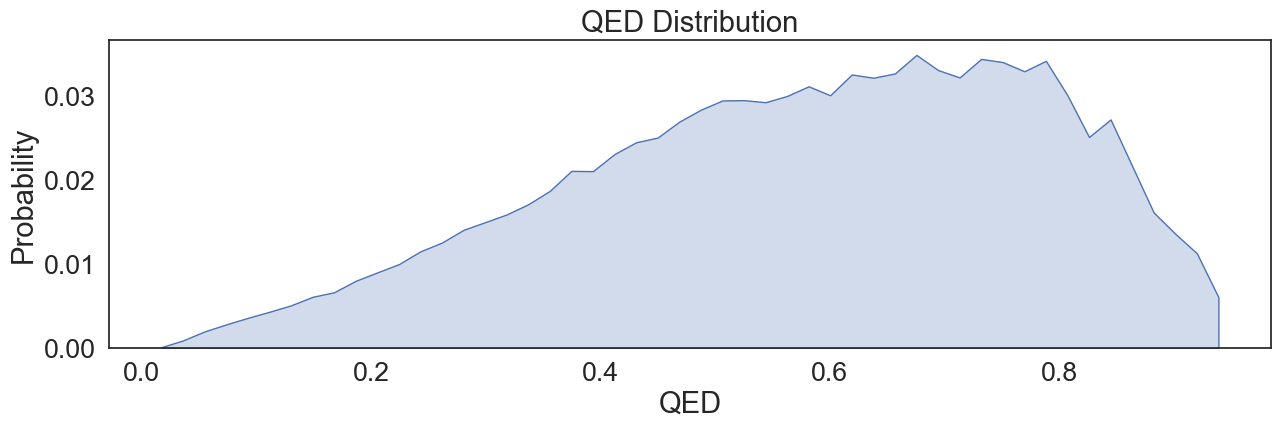

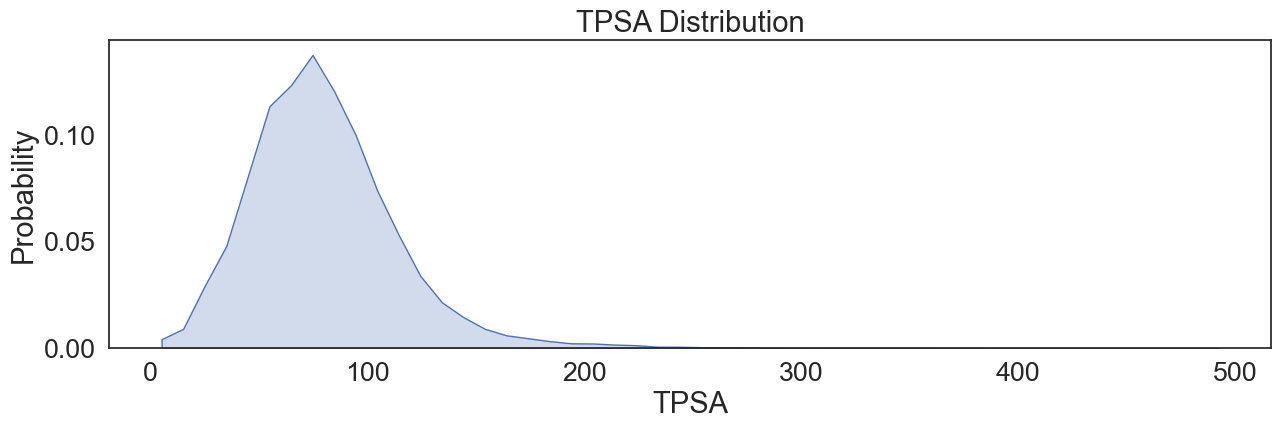

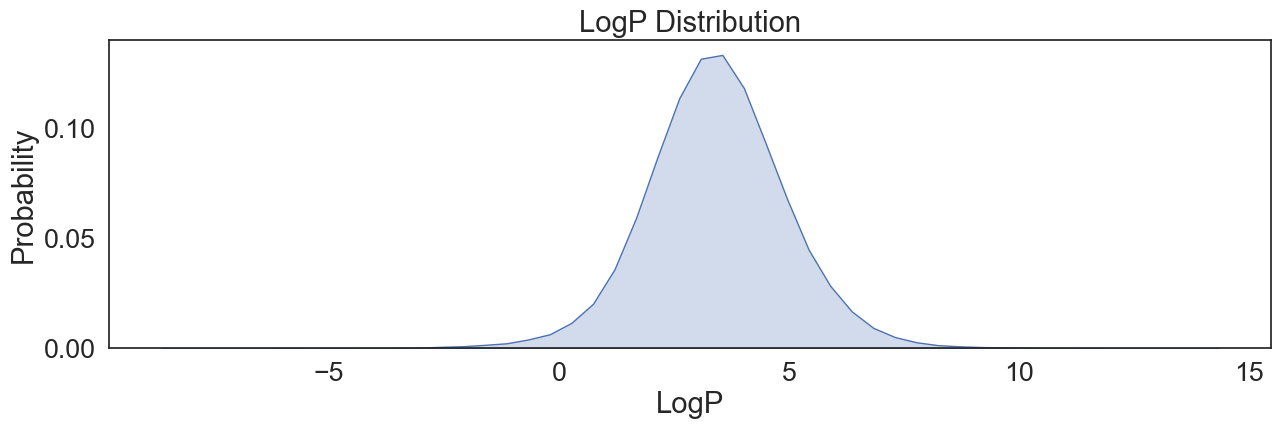

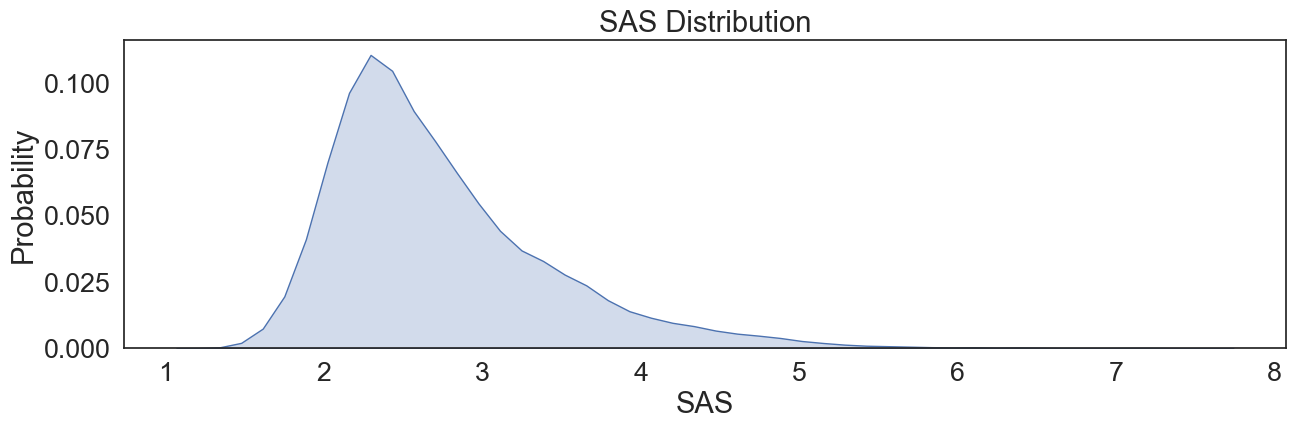

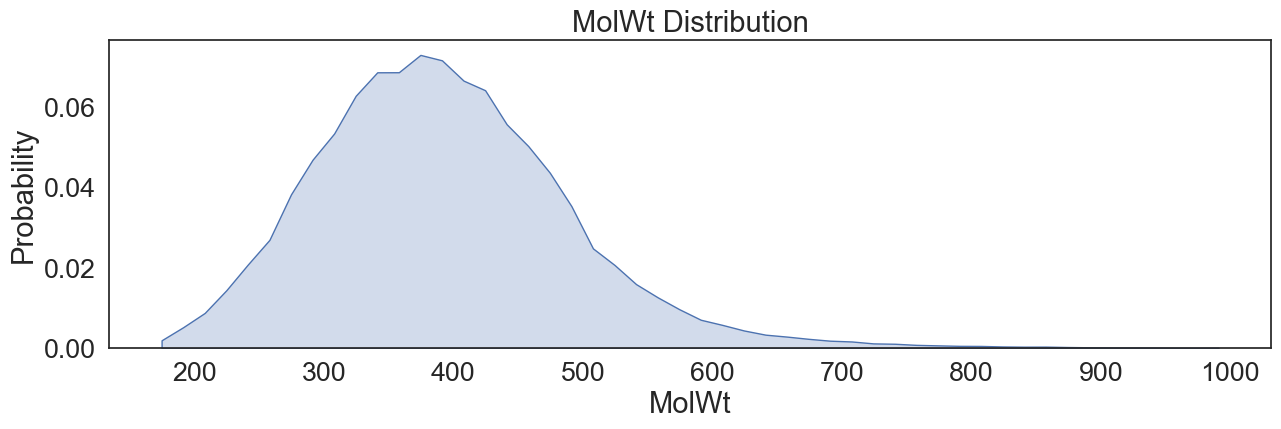

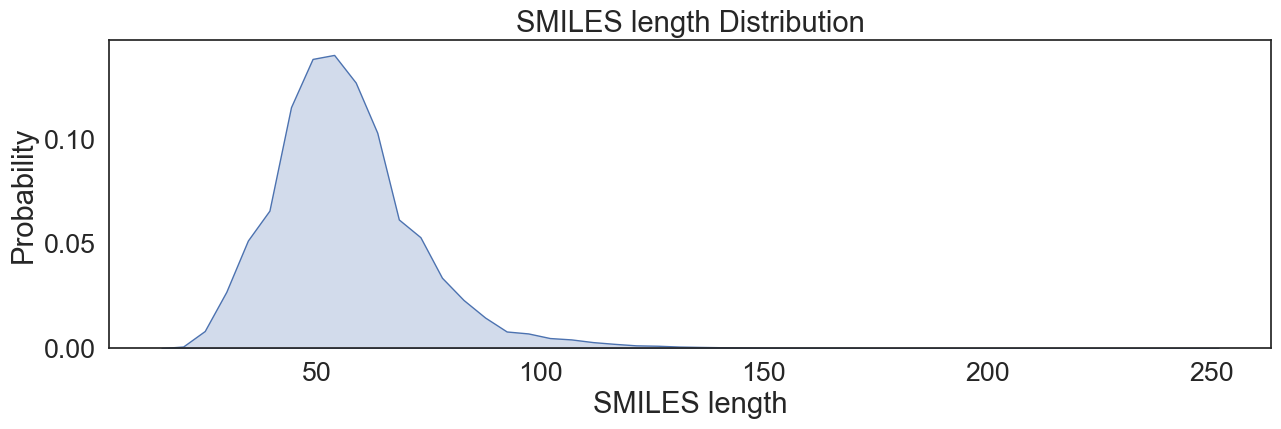

In [15]:
for key in ['QED', 'TPSA', 'LogP', 'SAS', 'MolWt', 'SMILES length']:
    newdata = pd.DataFrame()
    newdata[key] = tempdf[key]
    sns.set(font_scale=1.75)  
    sns.set_style("white")
    sns.histplot(newdata,  stat='probability', element='poly', fill=True, common_norm=True, bins=50)
    plt.title(key + ' Distribution')
    plt.legend('', frameon=False)
    plt.xlabel(key)
    plt.savefig('IMAGES/dockstring_'+ key +'_distribution.png', dpi=100, bbox_inches='tight')
    plt.show()

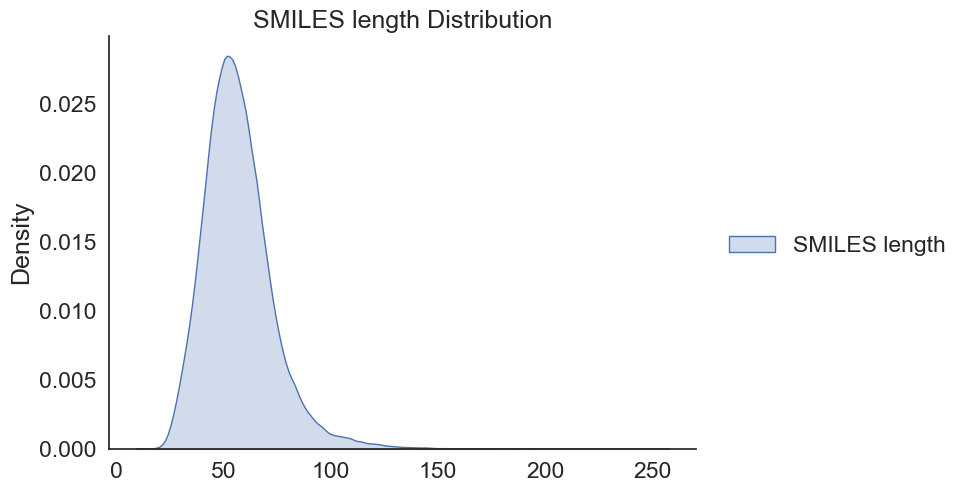

In [16]:
sns.set(font_scale=1.5)  
sns.set_style("white")
sns.displot(newdata, kind="kde", fill=True, aspect=1.5, height=5, common_norm=True)
plt.title(key + ' Distribution')
plt.savefig('IMAGES/dockstring_'+ key +'_distribution.png', dpi=100, bbox_inches='tight')
plt.show()